<a href="https://colab.research.google.com/github/nicreeis/colab-dailydata-s3/blob/main/1TSCPA_COLAB_DAILY_DATA_SPRINT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INSTRUÇÕES**: **Não** rodar o código todo de uma vez, importante seguir a sequência e **rodar cada código de forma unitária** a fim de evitar possíveis erros.

#Obtendo dados diretamente do Kaggle

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'state-of-data-2022:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2994878%2F5154266%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240405%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240405T135021Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2b5e6beabe33337517e91da5cfc9cea573a3404dd050e7f575fd8df78e8df84070a29156c8928fc646f35fc330f17d3eb1cbccda25d1a7854a8fb89504edbb98949091d144db20f938cfbb4c84d5d284e9cef03563269a5d20e170bed4494be4c65ba39e04b66ad8da0bd45b382df17e2414556b31f9887ce873fd96885477fee45eb53f7436dee61e6a532b4d5b487e420288db32b0f704a7fb3910615eed09e640b1a122f3bc75fa62de2e9d5dd1df99ff5f13478bf4480d2b10deec100fe008892751c8f6d77396e6b5c542409f77763abee6a61d14b8637d79a31f816b60ea76d7646d9261c92e0d5298b77a37a88194de8ef43950c06371ced61e91d3fd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1019910 bytes downloaded
Downloaded and uncompressed: state-of-data-2022
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-of-data-2022/State_of_data_2022.csv


#Criando o DF

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

df = pd.read_csv('/kaggle/input/state-of-data-2022/State_of_data_2022.csv',
                                sep = ',',
                                encoding = 'UTF-8',
                                decimal = '.')
df

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Refinando os nomes das colunas

In [ ]:
for col in df.columns:
    new_col_name = col.replace("'", "").replace("(", "").replace(")", "").strip()
    df.rename(columns={col: new_col_name}, inplace=True)

df

,"P0, id","P1_a , Idade","P1_a_1 , Faixa idade","P1_b , Genero","P1_c , Cor/raca/etnia","P1_d , PCD","P1_e , experiencia_profissional_prejudicada","P1_f , aspectos_prejudicados","P1_g , vive_no_brasil","P1_i , Estado onde mora",...,"P8_d_2 , Coletando e limpando os dados que uso para análise e modelagem.","P8_d_3 , Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.","P8_d_4 , Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas produtos de dados.","P8_d_5 , Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","P8_d_6 , Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","P8_d_7 , Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","P8_d_8 , Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","P8_d_9 , Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.","P8_d_10 , Criando e gerenciando soluções de Feature Store e cultura de MLOps.","P8_d_11 , Criando e mantendo a infra que meus modelos e soluções rodam clusters, servidores, API, containers, etc."
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df.columns:
    parts = col.split(", ")
    if len(parts) > 1:
        new_col_name = parts[1].strip()
        df.rename(columns={col: new_col_name}, inplace=True)

df

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,Entrando em contato com os times de negócio para definição do problema,Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas produtos de dados.,Colocando modelos em produção,Cuidando da manutenção de modelos de Machine Learning já em produção,Realizando construções de dashboards em ferramentas de BI como PowerBI,Utilizando ferramentas avançadas de estatística como SAS,Criando e dando manutenção em ETLs,Criando e gerenciando soluções de Feature Store e cultura de MLOps.,Criando e mantendo a infra que meus modelos e soluções rodam clusters
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Obtendo os nomes das colunas

In [ ]:
nomes_colunas = df.columns.tolist()
df_nomes_colunas = pd.DataFrame(nomes_colunas, columns=['Nome da Coluna'])
df_nomes_colunas

,Nome da Coluna
0,id
1,Idade
2,Faixa idade
3,Genero
4,Cor/raca/etnia
...,...
348,Realizando construções de dashboards em ferram...
349,Utilizando ferramentas avançadas de estatístic...
350,Criando e dando manutenção em ETLs
351,Criando e gerenciando soluções de Feature Stor...


#Qual estado/região comporta a maior quantidade de funcionários na área de Dados?

##Estado

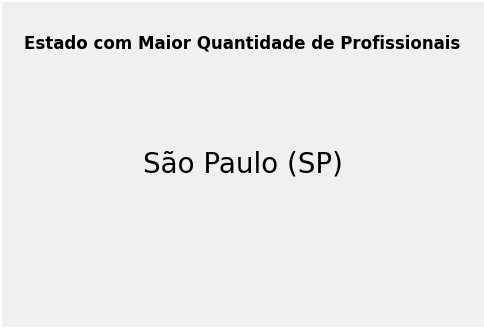

In [ ]:
contagem = df['Estado onde mora'].value_counts()
maior_estado = contagem.idxmax()

fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('#f0f0f0')
fig.patch.set_linewidth(2)

ax.set_xlim(0.1, 0.9)
ax.set_ylim(0.1, 0.9)

ax.set_facecolor('white')

ax.text(0.5, 0.8, 'Estado com Maior Quantidade de Profissionais', ha='center', fontsize=12, weight='bold')
ax.text(0.5, 0.5, f'{maior_estado}', ha='center', va='center', fontsize=20, color='black')

ax.axis('off')

plt.show()

##Região

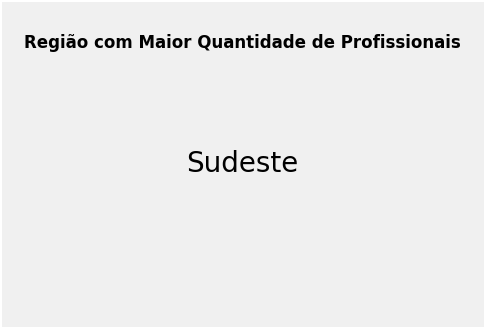

In [ ]:
contagem = df['Regiao onde mora'].value_counts()
maior_regiao = contagem.idxmax()

fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('#f0f0f0')
fig.patch.set_linewidth(2)

ax.set_xlim(0.1, 0.9)
ax.set_ylim(0.1, 0.9)

ax.set_facecolor('white')

ax.text(0.5, 0.8, 'Região com Maior Quantidade de Profissionais', ha='center', fontsize=12, weight='bold')
ax.text(0.5, 0.5, f'{maior_regiao}', ha='center', va='center', fontsize=20, color='black')

ax.axis('off')

plt.show()

#Concentração maior de profissionais por faixa etária?

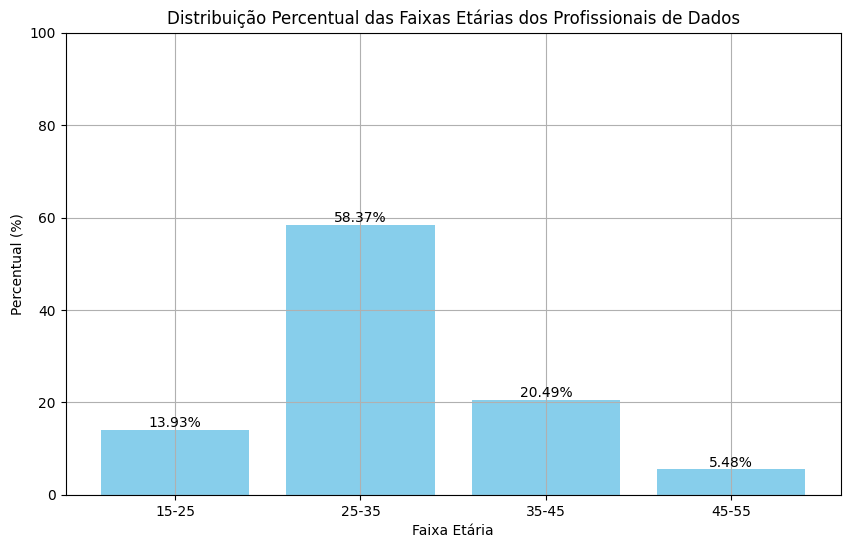

In [ ]:
faixas_etarias = [(15, 25), (25, 35), (35, 45), (45, 55), (55, 65)]

def calcular_faixa_etaria(idade):
    for faixa in faixas_etarias:
        if idade >= faixa[0] and idade < faixa[1]:
            return f'{faixa[0]}-{faixa[1]}'
    return '>=80'

df['Faixa Etária'] = df['Idade'].apply(calcular_faixa_etaria)

distribuicao_percentual = df['Faixa Etária'].value_counts(normalize=True) * 100

distribuicao_percentual = distribuicao_percentual.reindex([f'{inicio}-{fim}' for inicio, fim in faixas_etarias])

plt.figure(figsize=(10, 6))
bars = plt.bar(distribuicao_percentual.index, distribuicao_percentual.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    if np.isfinite(height):
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual das Faixas Etárias dos Profissionais de Dados')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

#Quantidade de profissionais de dados que trabalham remotamente, em modelo híbrido ou presencial

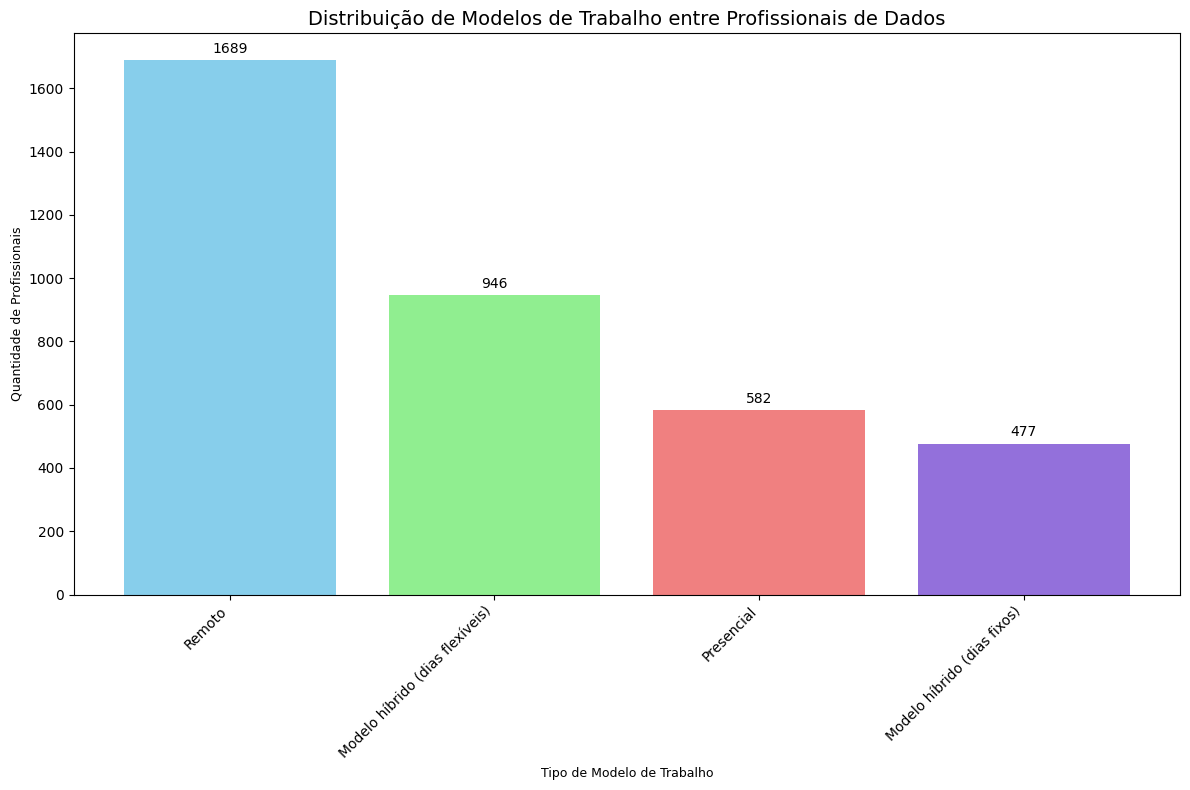

In [ ]:
df_quantidade_modelo = df


df_quantidade_modelo.iloc[:, 48] = df_quantidade_modelo.iloc[:, 48].replace({
    'Modelo 100% presencial': 'Presencial',
    'Modelo 100% remoto': 'Remoto',
    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)': 'Modelo híbrido (dias flexíveis)',
    'Modelo híbrido com dias fixos de trabalho presencial': 'Modelo híbrido (dias fixos)',
})


modelo_trabalho = df_quantidade_modelo.groupby(df_quantidade_modelo.columns[48]).size().reset_index(name='quantidade')
modelo_trabalho = modelo_trabalho.sort_values(by='quantidade', ascending=False)

cores_modelo_trabalho = ['skyblue', 'lightgreen', 'lightcoral', 'mediumpurple']


plt.figure(figsize=(12, 8))
barras = plt.bar(modelo_trabalho.iloc[:, 0], modelo_trabalho['quantidade'], color=cores_modelo_trabalho)


plt.xlabel('Tipo de Modelo de Trabalho', fontsize=9)
plt.ylabel('Quantidade de Profissionais', fontsize=9)
plt.title('Distribuição de Modelos de Trabalho entre Profissionais de Dados', fontsize=14)
plt.xticks(rotation=45, ha='right')


for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura}', xy=(barra.get_x() + barra.get_width() / 2, altura), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Distribuição da situação atual de trabalho na área de dados

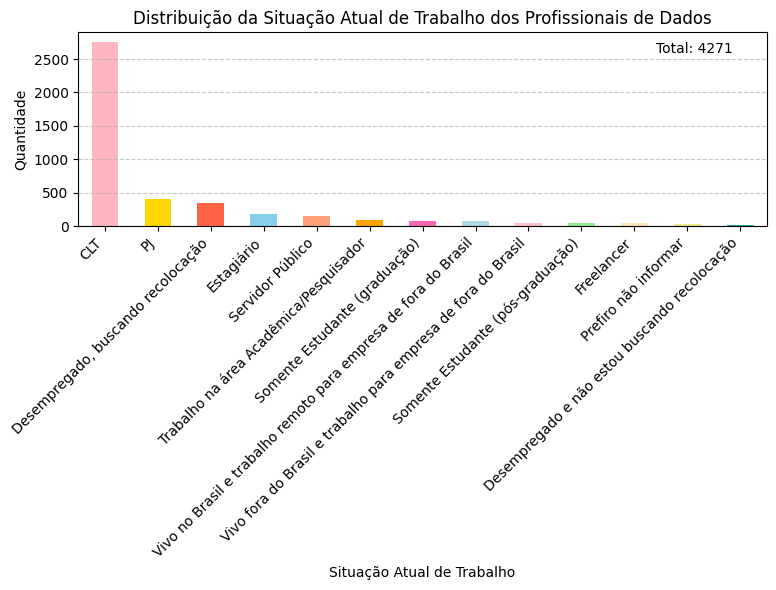

In [ ]:
df['Qual sua situação atual de trabalho?'] = df['Qual sua situação atual de trabalho?'].replace({
    'Empregado (CLT)': 'CLT',
    'Empreendedor ou Empregado (CNPJ)': 'PJ',
    'Estagiário': 'Estagiário',
    'Servidor Público': 'Servidor Público'
})

distribuicao_situacao = df['Qual sua situação atual de trabalho?'].value_counts()

cores = {
    'CLT': '#FFB6C1',
    'PJ': '#FFD700',
    'Estagiário': '#87CEEB',
    'Servidor Público': '#FFA07A',
    'Desempregado, buscando recolocação': '#FF6347',
    'Desempregado e não estou buscando recolocação': '#20B2AA',
    'Somente Estudante (graduação)': '#FF69B4',
    'Somente Estudante (pós-graduação)': '#90EE90',
    'Trabalho na área Acadêmica/Pesquisador': '#FFA500',
    'Prefiro não informar': '#F0E68C',
    'Vivo fora do Brasil e trabalho para empresa de fora do Brasil': '#FFC0CB',
    'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil': '#ADD8E6',
    'Freelancer': '#FFE4B5'
}

plt.figure(figsize=(8, 6))
bars = distribuicao_situacao.plot(kind='bar', color=[cores[categoria] for categoria in distribuicao_situacao.index])

plt.xlabel('Situação Atual de Trabalho')
plt.ylabel('Quantidade')
plt.title('Distribuição da Situação Atual de Trabalho dos Profissionais de Dados')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.text(0.95, 0.95, f'Total: {len(df)}', transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()

#Quantidade de profissionais de dados contratados como PJ e CLT

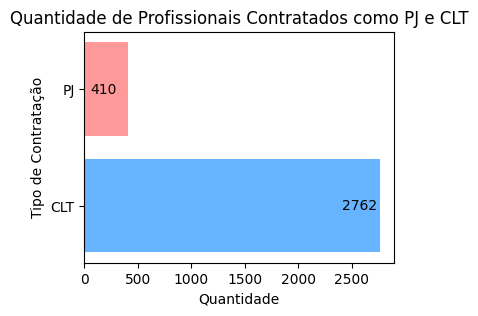

In [ ]:
quantidade_pj = (df['Qual sua situação atual de trabalho?'] == 'PJ').sum()
quantidade_clt = (df['Qual sua situação atual de trabalho?'] == 'CLT').sum()

categorias = ['PJ', 'CLT']
quantidades = [quantidade_pj, quantidade_clt]
cores = ['#ff9999', '#66b3ff']

plt.figure(figsize=(4, 3))
bars = plt.barh(categorias, quantidades, color=cores)

for bar in bars:
    plt.text(bar.get_width() - 350, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', color='black')

plt.title('Quantidade de Profissionais Contratados como PJ e CLT')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Contratação')
plt.gca().invert_yaxis()
plt.show()

#Distribuição de situação atual de trabalho por região geográfica

<ipython-input-22-3ecc574b7760>:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

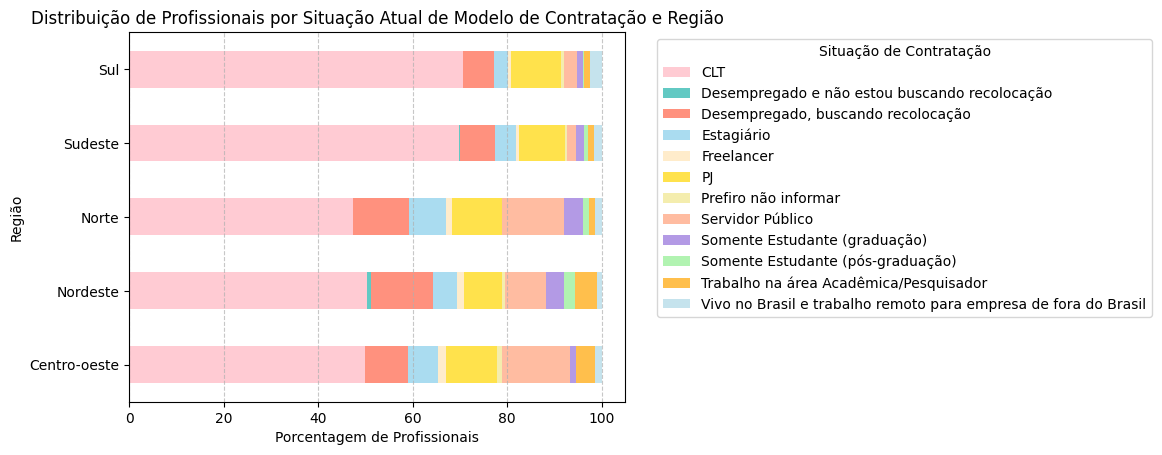

In [ ]:
distribuicao_cruzada = pd.crosstab(df['Regiao onde mora'], df['Qual sua situação atual de trabalho?'])

distribuicao_cruzada_porcentagem = distribuicao_cruzada.div(distribuicao_cruzada.sum(axis=1), axis=0) * 100

cores = {
    'CLT': '#FFB6C1',
    'PJ': '#FFD700',
    'Estagiário': '#87CEEB',
    'Servidor Público': '#FFA07A',
    'Desempregado, buscando recolocação': '#FF6347',
    'Desempregado e não estou buscando recolocação': '#20B2AA',
    'Somente Estudante (graduação)': '#9370DB',
    'Somente Estudante (pós-graduação)': '#90EE90',
    'Trabalho na área Acadêmica/Pesquisador': '#FFA500',
    'Prefiro não informar': '#F0E68C',
    'Vivo fora do Brasil e trabalho para empresa de fora do Brasil': '#FF69B4',
    'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil': '#ADD8E6',
    'Freelancer': '#FFE4B5'
}

plt.figure(figsize=(10, 6))
distribuicao_cruzada_porcentagem.plot(kind='barh', stacked=True, alpha=0.7, color=[cores[coluna] for coluna in distribuicao_cruzada.columns])
plt.xlabel('Porcentagem de Profissionais')
plt.ylabel('Região')
plt.title('Distribuição de Profissionais por Situação Atual de Modelo de Contratação e Região')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend(title='Situação de Contratação', labels=distribuicao_cruzada.columns.tolist(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#Probabilidade de trabalhar remotamente: comparação entre PJ e CLT

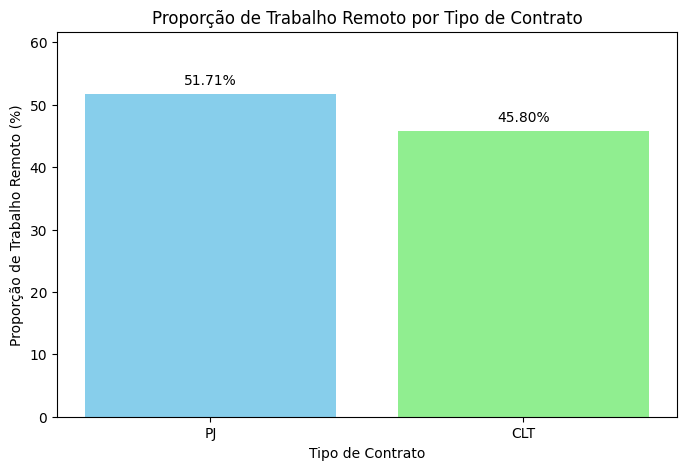

In [ ]:
filtro_trabalho_remoto = df.iloc[:, 48].str.contains("Remoto", case=False, na=False)
pj_remoto = df[df.iloc[:, 16].str.contains("PJ", case=False, na=False) & filtro_trabalho_remoto]
clt_remoto = df[df.iloc[:, 16].str.contains("CLT", case=False, na=False) & filtro_trabalho_remoto]

proporcao_pj_remoto = len(pj_remoto) / len(df[df.iloc[:, 16].str.contains("PJ", case=False, na=False)])
proporcao_clt_remoto = len(clt_remoto) / len(df[df.iloc[:, 16].str.contains("CLT", case=False, na=False)])


categorias = ['PJ', 'CLT']
proporcoes = [proporcao_pj_remoto * 100, proporcao_clt_remoto * 100]

plt.figure(figsize=(8, 5))
bars = plt.bar(categorias, proporcoes, color=['skyblue', 'lightgreen'])


plt.title('Proporção de Trabalho Remoto por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção de Trabalho Remoto (%)')
plt.ylim(0, max(proporcoes) + 10)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', va='bottom')

plt.show()

#Regiões onde se encontra a maior proporção de profissionais que trabalham remotamente

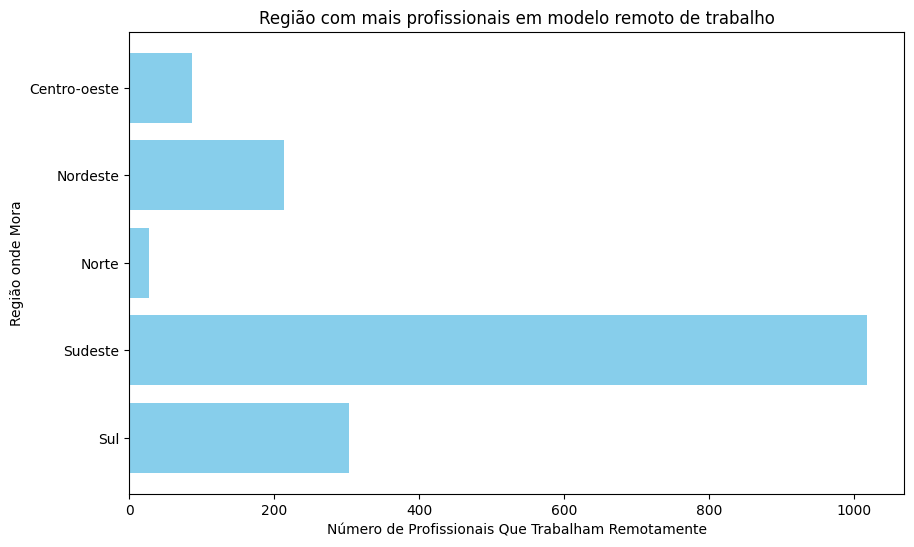

In [ ]:
contagem_remoto = df['Atualmente qual a sua forma de trabalho?'].value_counts().get('Remoto', 0)

contagem_trabalho_remoto = df.groupby('Regiao onde mora')['Atualmente qual a sua forma de trabalho?'].apply(lambda x: (x == 'Remoto').sum())

plt.figure(figsize=(10, 6))
plt.barh(contagem_trabalho_remoto.index, contagem_trabalho_remoto.values, color='skyblue')
plt.xlabel('Número de Profissionais Que Trabalham Remotamente')
plt.ylabel('Região onde Mora')
plt.title('Região com mais profissionais em modelo remoto de trabalho')
plt.gca().invert_yaxis()
plt.show()

#As regiões com maior demanda de profissionais de dados também oferecem mais flexibilidade de trabalho remoto?

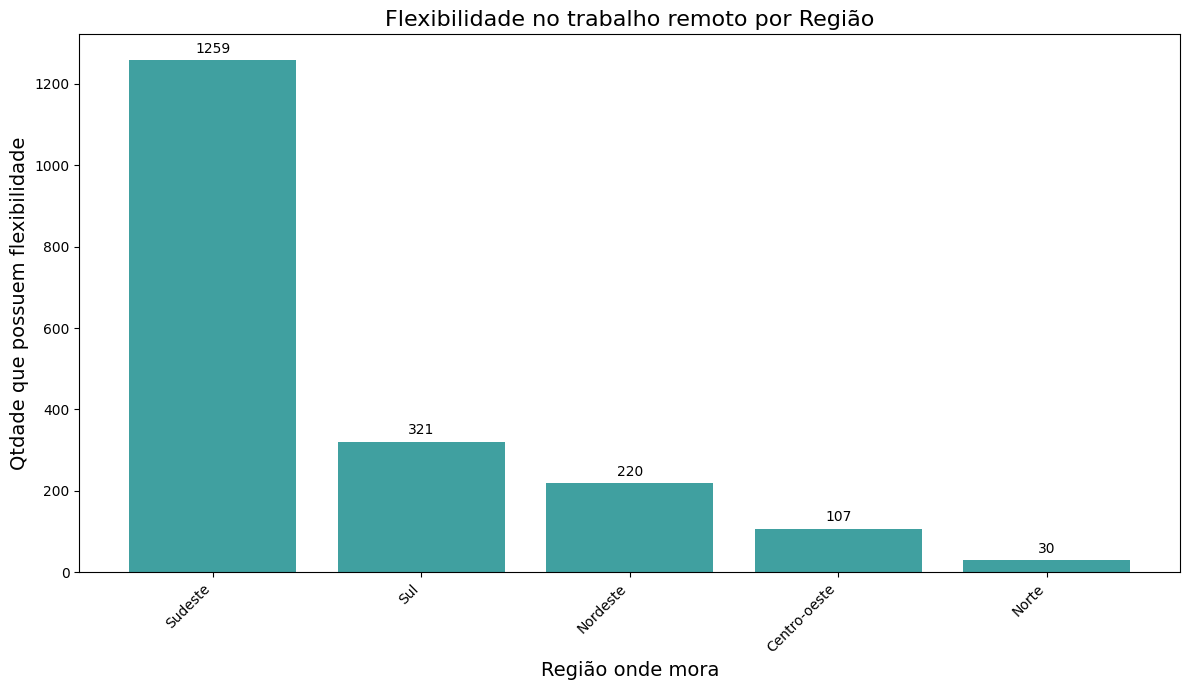

In [ ]:
df_flexibilidade = df.groupby(['Regiao onde mora', 'Flexibilidade de trabalho remoto']).size().reset_index(name='Contagem')

df_flexibilidade = df_flexibilidade[df_flexibilidade['Flexibilidade de trabalho remoto'] == True]

df_flexibilidade_ordenado = df_flexibilidade.sort_values(by='Contagem', ascending=False)

plt.figure(figsize=(12, 7))
bars = plt.bar(df_flexibilidade_ordenado['Regiao onde mora'], df_flexibilidade_ordenado['Contagem'], color='teal', alpha=0.75)

plt.xlabel('Região onde mora', fontsize=14)
plt.ylabel('Qtdade que possuem flexibilidade', fontsize=14)
plt.title('Flexibilidade no trabalho remoto por Região', fontsize=16)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()